In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Histogram Review: Heights and Heredity ##

In [7]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


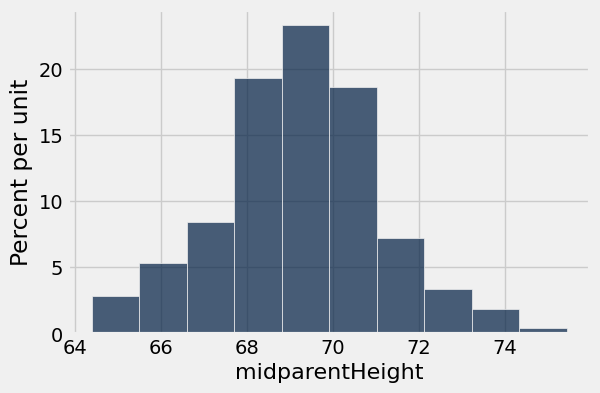

In [8]:
galton.hist('midparentHeight')

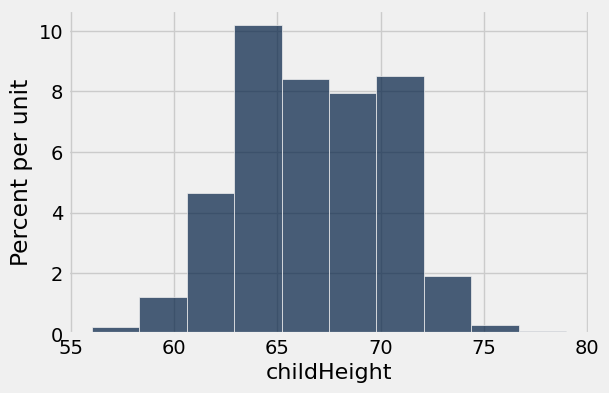

In [9]:
galton.hist('childHeight')

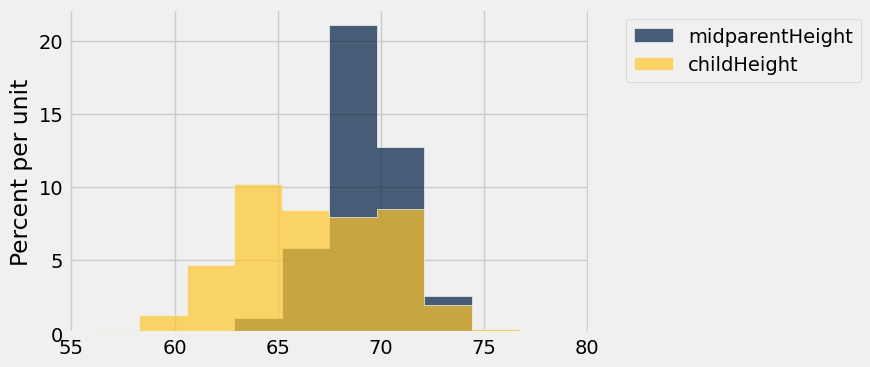

In [10]:
galton.hist('midparentHeight', 'childHeight')

## Apply

In [11]:
staff = Table().with_columns(
    'Employee', make_array('Jim', 'Dwight', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
staff

Employee,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904


In [12]:
def greeting(person):
    return 'Dunder Mifflin, this is ' + person

In [13]:
greeting('Pam')

'Dunder Mifflin, this is Pam'

In [14]:
greeting('Erin')

'Dunder Mifflin, this is Erin'

In [15]:
staff.apply(greeting, 'Employee')

array(['Dunder Mifflin, this is Jim', 'Dunder Mifflin, this is Dwight',
       'Dunder Mifflin, this is Michael', 'Dunder Mifflin, this is Creed'],
      dtype='<U31')

In [16]:
def name_and_age(name, year):
    age = 2019 - year
    return name + ' is ' + str(age)

In [17]:
staff.apply(name_and_age, 'Employee', 'Birth Year')

array(['Jim is 34', 'Dwight is 31', 'Michael is 52', 'Creed is 115'],
      dtype='<U13')

## Prediction ##

In [18]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


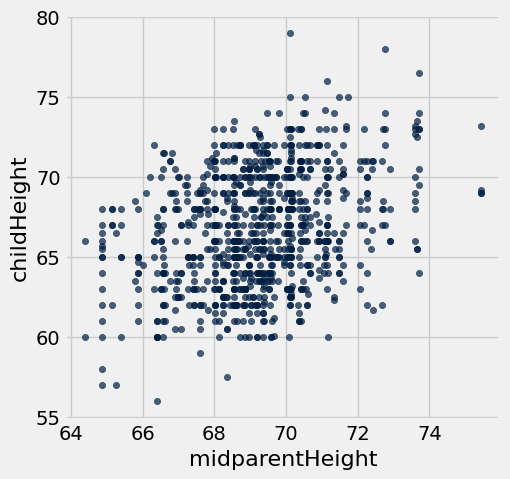

In [19]:
galton.scatter('midparentHeight', 'childHeight')

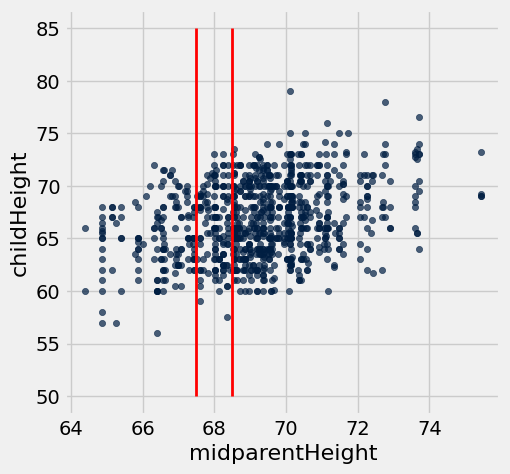

In [20]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [21]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby_mean = nearby.column('childHeight').mean()
nearby_mean

66.24045801526718

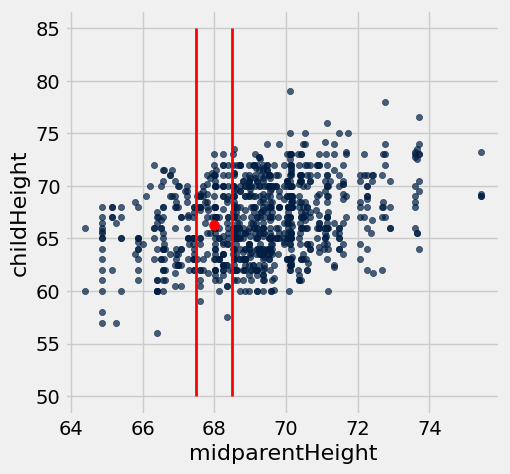

In [22]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [23]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [24]:
predict(68)

66.24045801526718

In [25]:
predict(70)

67.272850678733022

In [26]:
predict(73)

69.5

In [27]:
predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights

array([ 70.1       ,  70.1       ,  70.1       ,  70.1       ,
        70.41578947,  70.41578947,  70.41578947,  70.41578947,
        68.5025    ,  68.5025    ,  68.5025    ,  68.5025    ,
        68.5025    ,  68.5025    ,  68.5025    ,  66.43149606,
        66.43149606,  66.43149606,  66.43149606,  66.43149606,
        66.43149606,  70.41578947,  70.41578947,  70.41578947,
        70.41578947,  70.41578947,  70.41578947,  70.41578947,
        69.18571429,  69.18571429,  69.18571429,  69.18571429,
        68.66052632,  67.63423913,  67.63423913,  67.63423913,
        67.63423913,  67.63423913,  67.63423913,  67.63423913,
        67.63423913,  67.37410714,  68.77428571,  68.77428571,
        68.77428571,  68.77428571,  68.59230769,  68.59230769,
        68.59230769,  68.07323944,  68.07323944,  68.07323944,
        68.07323944,  68.07323944,  68.07323944,  68.07323944,
        68.07323944,  68.07323944,  68.05465116,  68.05465116,
        68.05465116,  68.05465116,  68.05465116,  68.05

In [28]:
galton = galton.with_column('predictedHeight', predicted_heights)

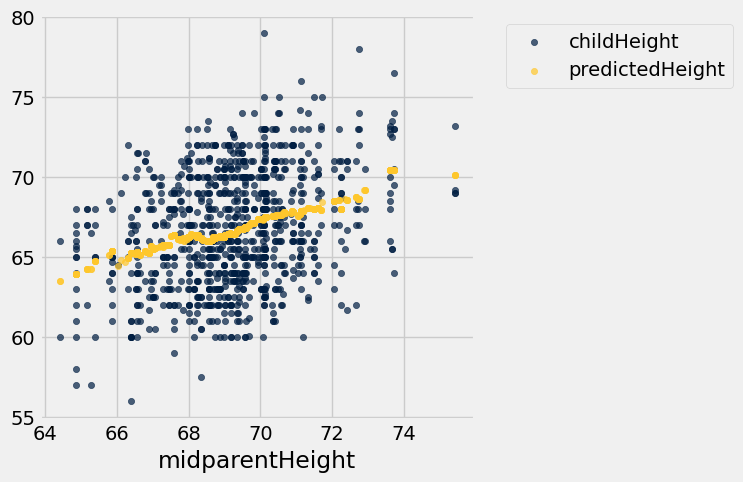

In [29]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

## Prediction Accuracy ##

In [30]:
def difference(x, y):
    return x - y

In [31]:
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

array([ -3.10000000e+00,   9.00000000e-01,   1.10000000e+00,
         1.10000000e+00,  -3.08421053e+00,  -2.08421053e+00,
         4.91578947e+00,   4.91578947e+00,  -2.49750000e+00,
         5.02500000e-01,  -1.99750000e+00,   2.50000000e-03,
         1.50250000e+00,   4.00250000e+00,   5.50250000e+00,
        -5.56850394e+00,  -2.56850394e+00,  -1.56850394e+00,
        -6.85039370e-02,   3.93149606e+00,   3.93149606e+00,
         9.15789474e-01,  -6.08421053e+00,  -3.58421053e+00,
        -2.58421053e+00,  -2.58421053e+00,  -8.42105263e-02,
         6.41578947e+00,  -1.31428571e+00,   1.18571429e+00,
         3.18571429e+00,   3.18571429e+00,   3.16052632e+00,
        -6.36576087e+00,  -2.36576087e+00,  -3.65760870e-01,
         6.34239130e-01,   6.34239130e-01,   1.63423913e+00,
         4.13423913e+00,   4.63423913e+00,   2.37410714e+00,
        -2.22571429e+00,   6.77428571e+00,   7.74285714e-01,
         1.77428571e+00,  -2.40769231e+00,  -1.90769231e+00,
         1.89230769e+00,

In [32]:
galton = galton.with_column('errors',pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,1,male,71,68.5025,-2.4975
3,75,64,72.06,2,2,female,68,68.5025,0.5025


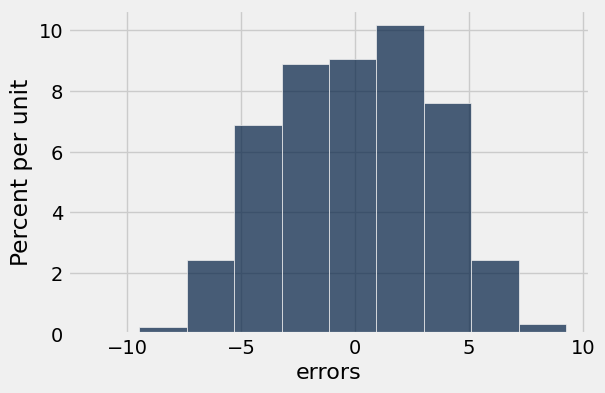

In [33]:
galton.hist('errors')

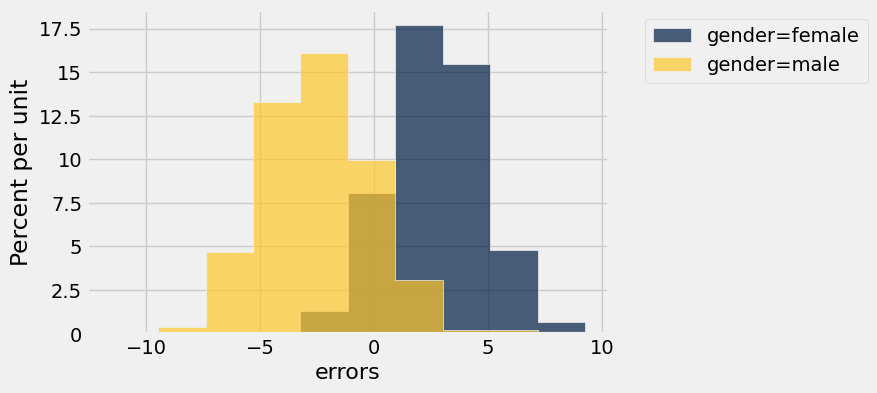

In [34]:
galton.hist('errors', group='gender')

# Discussion Question

In [35]:
def predict_smarter(h, g):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    nearby_same_gender = nearby.where('gender', g)
    return nearby_same_gender.column('childHeight').mean()

In [36]:
predict_smarter(68, 'female')

62.909259259259265

In [37]:
predict_smarter(68, 'male')

68.576623376623374

In [38]:
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)

In [39]:
smarter_pred_errs = galton.apply(difference, 'childHeight', 'smartPredictedHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)

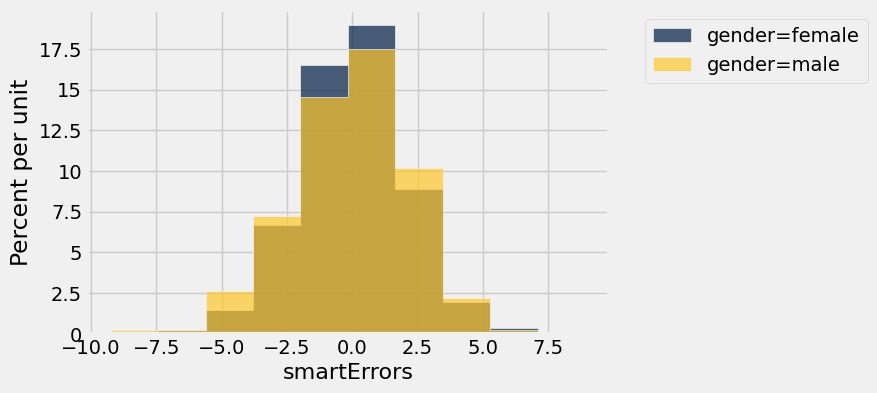

In [40]:
galton.hist('smartErrors', group='gender')

## Grouping by One Column ##

In [41]:
cones = Table.read_table('cones.csv')

In [42]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [43]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [44]:
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [45]:
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping By One Column: Welcome Survey ##

In [46]:
survey = Table.read_table('welcome_survey_v2.csv')
survey

Year,Extraversion,Number of textees,Hours of sleep
Third,4,6,4
Fourth,8,6,7
First,9,6,7
Third,2,3,6.75
Second,7,10,7
First,8,50,8
Fourth,4,5,10
Second,7,2,5
Fourth,3,7,5
Second,6,8,5.5


In [47]:
survey.group('Year', np.average)

Year,Extraversion average,Number of textees average,Hours of sleep average
First,5.8314,8.27326,7.12112
Fourth,5.37719,6.01754,7.13596
Fourth or above,6.33333,7.66667,7.2
Second,5.89051,7.47445,7.04623
Third,5.60837,5.71483,6.95913


In [48]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Year average,Number of textees average,Hours of sleep average
1,,3.28571,6.61905
2,,4.1087,6.78804
3,,5.31788,7.01987
4,,6.44134,7.06145
5,,6.64398,7.08639
6,,6.53571,7.10714
7,,8.10484,7.10282
8,,9.5625,7.09375
9,,9.81429,7.09286
10,,10.7143,7.2619


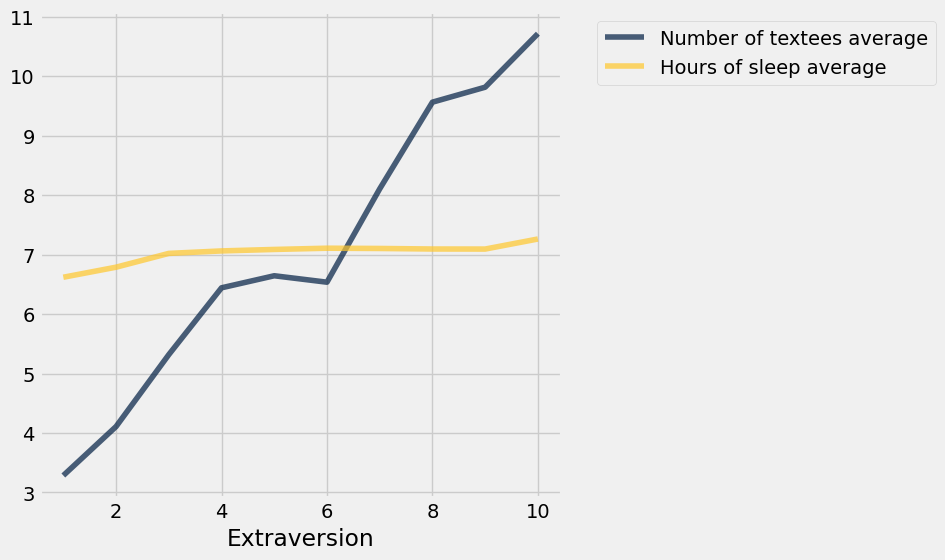

In [49]:
by_extra.select(0,2,3).plot('Extraversion') # Drop the 'Years average' column

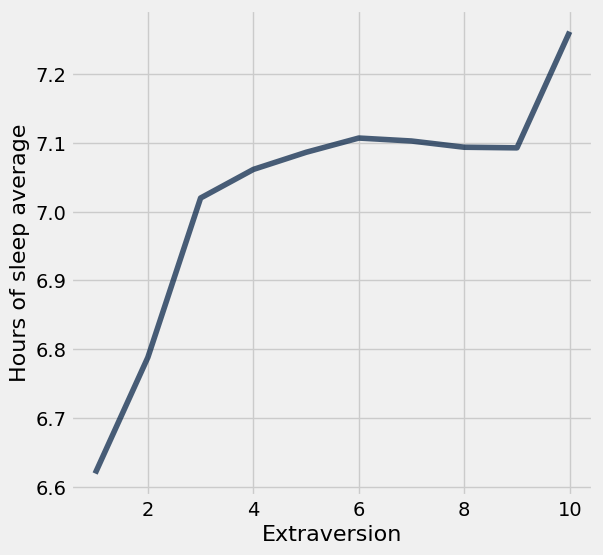

In [50]:
by_extra.select(0,3).plot('Extraversion')

## Lists

In [51]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [52]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

[1, 5, 'hello', 5.0, array([1, 2, 3])]

## Grouping by Two Columns ##

In [53]:
survey = Table.read_table('welcome_survey_v3.csv')

In [54]:
survey.group(['Handedness','Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,5
Both,On your right side,7
Both,On your stomach,1
Left-handed,On your back,31
Left-handed,On your left side,27
Left-handed,On your right side,30
Left-handed,On your stomach,12
Right-handed,On your back,268
Right-handed,On your left side,344


## Pivot Tables

In [55]:
survey.pivot('Sleep position', 'Handedness')

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,5,7,1
Left-handed,31,27,30,12
Right-handed,268,344,398,199


In [56]:
survey.pivot('Sleep position', 'Handedness', values='Extraversion', collect=np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,7,5.8,5.28571,8
Left-handed,5.45161,5.33333,5.56667,6.75
Right-handed,5.57836,5.70349,5.93467,5.90452


In [57]:
survey.group('Handedness', np.average)

Handedness,Year average,Extraversion average,Number of textees average,Hours of sleep average,Sleep position average
Both,,6,7.64706,6.79412,
Left-handed,,5.61,6.88,7.0475,
Right-handed,,5.78495,7.34243,7.0761,


## Lists

In [58]:
simple_list = ['hello', 7, 3.14, True]
simple_list

['hello', 7, 3.14, True]

In [59]:
my_array = make_array(1, 2, 3)

crowded_list = [my_array, 'what is going on', -10]
crowded_list

[array([1, 2, 3]), 'what is going on', -10]

In [60]:
Table().with_columns('Numbers', [1, 2, 3])

Numbers
1
2
3


In [61]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


In [62]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


## Cross-classification: grouping by two columns

In [63]:
survey.group(['Handedness','Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,5
Both,On your right side,7
Both,On your stomach,1
Left-handed,On your back,31
Left-handed,On your left side,27
Left-handed,On your right side,30
Left-handed,On your stomach,12
Right-handed,On your back,268
Right-handed,On your left side,344


In [64]:
survey.pivot('Sleep position', 'Handedness')

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,5,7,1
Left-handed,31,27,30,12
Right-handed,268,344,398,199


In [65]:
survey.pivot('Sleep position', 'Handedness', 'Hours of sleep', np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,6.125,6.6,7.42857,6
Left-handed,7.1371,7.11111,7.03333,6.70833
Right-handed,7.12313,7.00291,7.05402,7.18342


In [66]:
(survey.select('Handedness', 'Sleep position', 'Hours of sleep')
       .group(['Handedness','Sleep position'], np.average)).show()

Handedness,Sleep position,Hours of sleep average
Both,On your back,6.125
Both,On your left side,6.6
Both,On your right side,7.42857
Both,On your stomach,6
Left-handed,On your back,7.1371
Left-handed,On your left side,7.11111
Left-handed,On your right side,7.03333
Left-handed,On your stomach,6.70833
Right-handed,On your back,7.12313
Right-handed,On your left side,7.00291


In [70]:
# Here, pivot doesn't know how to combine all the hours of sleep
# for each subgroup of students
survey.pivot('Sleep position', 'Handedness', 'Hours of sleep')

TypeError: values requires collect to be specified

## Challenge Question ##

In [71]:
sky = Table.read_table('skyscrapers_v2.csv')
sky = (sky.with_column('age', 2020 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,6
Willis Tower,steel,Chicago,442.14,46
432 Park Avenue,concrete,New York City,425.5,5


In [74]:
# 1. For each city, what’s the tallest building for each material?

sky.pivot('material','city',values='height',collect=np.max)
sky.select('material', 'city', 'height').group(['city', 'material'], max)





city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


In [75]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?












### Take-home question: try it here!

In [76]:
# Generate a table of the names of the oldest buildings for each 
# material for each city:



## Joins ##

In [145]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [78]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [79]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


In [80]:
discounted_frac = 1 - combined.column('Coupon % off') / 100
combined.with_column(
    'Discounted Price', 
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


In [81]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25


In [141]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [143]:
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [144]:
drinks.join('Cafe',discounts,'Location')

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


## Billionaires

In [82]:
billionaires = Table.read_table('billionaires.csv')
billionaires

name,net worth,citizenship,industry
Jeff Bezos,115739645754,United States,Technology
Bill Gates,115488591742,United States,Technology
Bernard Arnault,102244728472,France,Consumer
Warren Buffett,89408278188,United States,Diversified
Mark Zuckerberg,83053011017,United States,Technology
Amancio Ortega,73839366133,Spain,Retail
Larry Page,69933009751,United States,Technology
Sergey Brin,67825250468,United States,Technology
Carlos Slim,62527178289,Mexico,Diversified
Charles Koch,61046822719,United States,Industrial


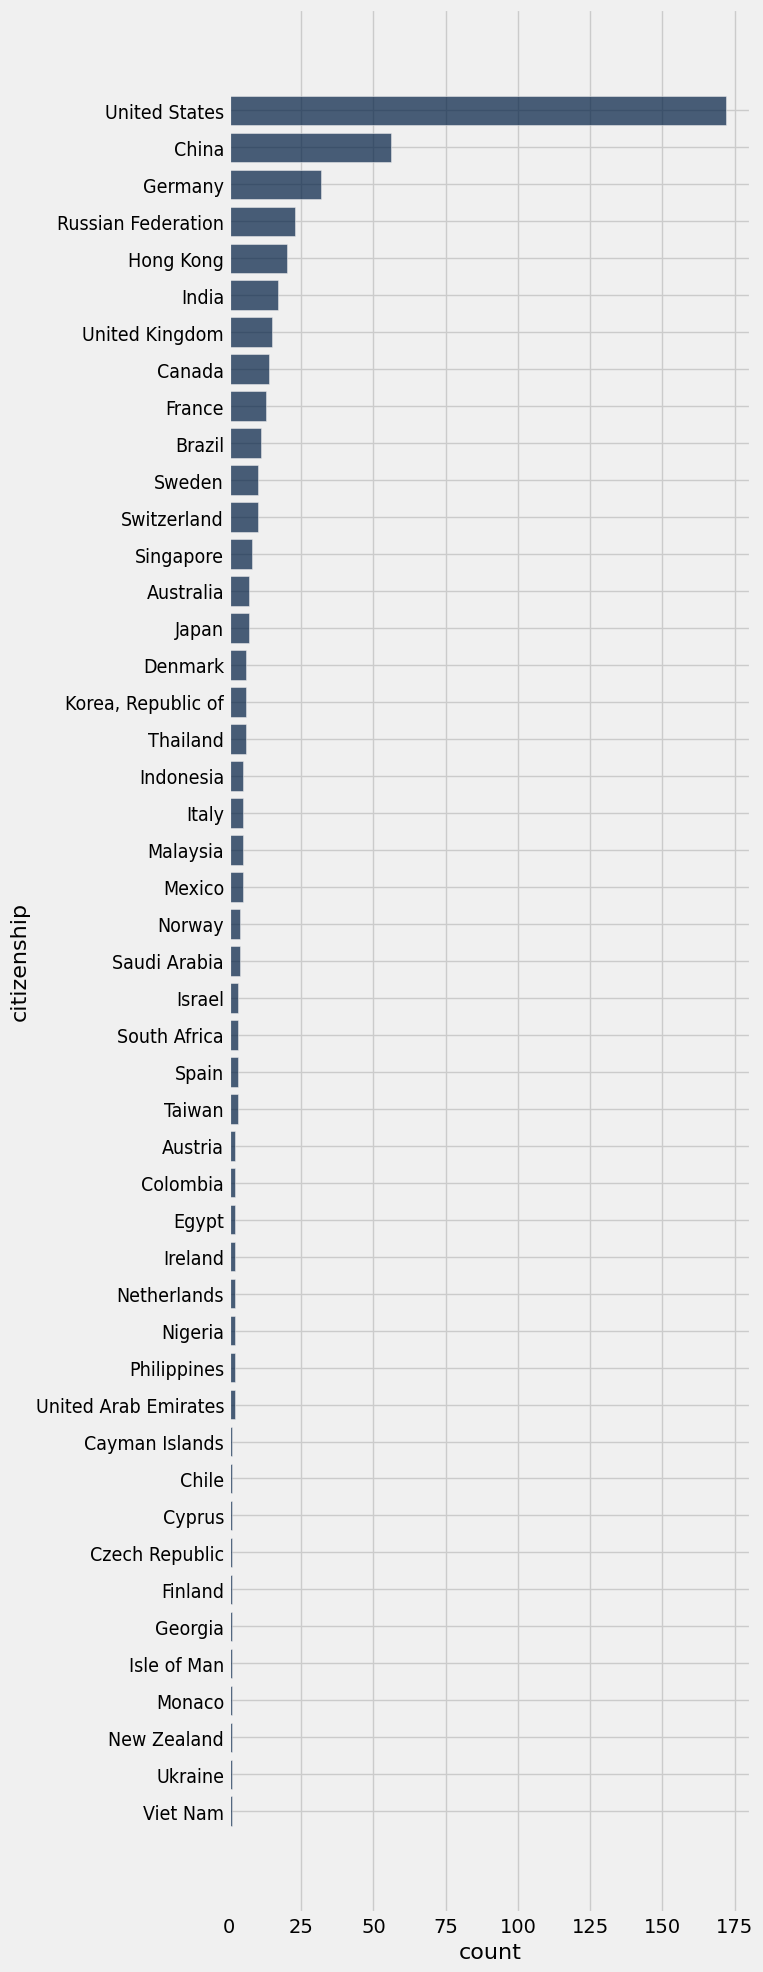

In [83]:
(billionaires.group('citizenship')
             .sort(1, descending=True)
             .barh('citizenship'))

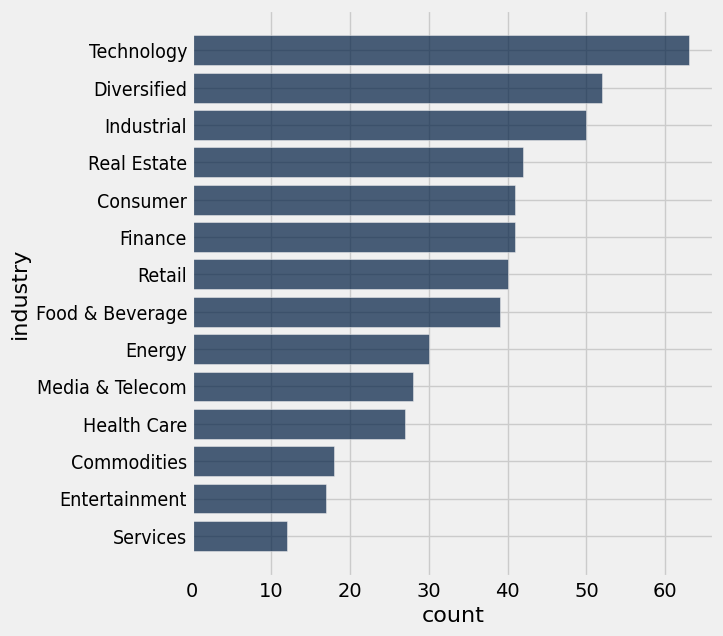

In [84]:
(billionaires.group('industry')
             .sort(1, descending=True)
             .barh('industry'))

In [85]:
billionaires.pivot('industry', 'citizenship').show()

citizenship,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Australia,2,0,0,0,0,0,0,0,1,0,2,0,0,2
Austria,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Brazil,1,0,0,0,0,5,3,0,1,0,0,0,0,1
Canada,1,0,0,1,0,0,1,0,0,7,0,3,0,1
Cayman Islands,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Chile,1,0,0,0,0,0,0,0,0,0,0,0,0,0
China,1,6,2,3,0,1,5,6,4,0,7,2,4,15
Colombia,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [86]:
countries = Table.read_table('countries.csv')
countries

Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad


In [87]:
countries.where('Continent', 'North America')

Continent,Country
North America,Antigua and Barbuda
North America,Bahamas
North America,Barbados
North America,Belize
North America,Canada
North America,Cayman Islands
North America,Costa Rica
North America,Cuba
North America,Dominica
North America,Dominican Republic


In [88]:
billionaires = billionaires.join('citizenship', countries, 'Country')
billionaires

citizenship,name,net worth,industry,Continent
Australia,Gina Rinehart,19984845036,Commodities,Oceania
Australia,Andrew Forrest,10221458789,Commodities,Oceania
Australia,Harry Triguboff,9467000000,Real Estate,Oceania
Australia,Scott Farquhar,9335988154,Technology,Oceania
Australia,Mike Cannon-Brookes,9335988154,Technology,Oceania
Australia,Frank Lowy,6655432824,Real Estate,Oceania
Australia,Anthony Pratt,6566000000,Industrial,Oceania
Austria,Dietrich Mateschitz,12251315379,Food & Beverage,Europe
Austria,Johann Graf,6509183360,Entertainment,Europe
Brazil,Jorge Paulo Lemann,23056345424,Food & Beverage,South America


In [89]:
billionaires.pivot('industry', 'Continent')

Continent,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Africa,0,0,2,0,0,0,1,0,2,2,0,0,0,0
Asia,7,10,27,12,4,4,11,11,21,3,23,8,6,21
Europe,1,17,13,1,4,1,9,10,21,4,5,15,4,6
North America,6,14,10,17,9,29,14,6,4,19,12,17,2,33
Oceania,2,0,0,0,0,1,0,0,1,0,2,0,0,2
South America,2,0,0,0,0,6,4,0,1,0,0,0,0,1


In [90]:
ceos = Table.read_table('ceo.csv')
ceos

company,ceo,party,amount
3M Co,Bob Ulrich,200,8500
3M Co,Linda Alvarado,100,11244.6
3M Co,Robert Ulrich,200,591450
AES Corporation,Andres Gluski,100,6000
AES Corporation,Charles Rossotti,100,2500
AES Corporation,Charles Rossotti,200,1000
AES Corporation,John Koskinen,100,19000
AES Corporation,Kristina Johnson,100,28480
AES Corporation,Philip Lader,100,2500
AES Corporation,Philip Odeen,100,750


/home/shaolin/Documents/Teaching/2023/cs2065/venv/lib/python3.9/site-packages/datascience/tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


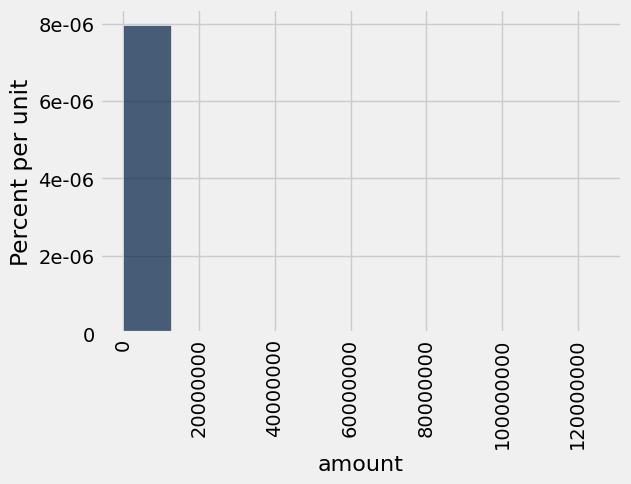

In [91]:
ceos.hist('amount')

In [92]:
ceos.sort('amount', descending=True)

company,ceo,party,amount
Hewlett-Packard Co,Margaret Whitman,200,1.25273e+08
Caterpillar Inc,Jon Huntsman,200,1.27686e+07
Las Vegas Sands,Sheldon Adelson,200,6.20425e+06
Las Vegas Sands,Sheldon g Adelson,200,5e+06
Visteon,Harry Wilson,200,4.0304e+06
Yahoo! Inc,Daniel Loeb,200,2.51255e+06
YRC Worldwide Inc,Matthew Doheny,200,1.47332e+06
Charles Schwab Corp,Charles Schwab,200,1.2364e+06
DTE Energy,James Nicholson,200,986850
Limited Brance,Leslie Wexner,200,942800


In [93]:
ceos.sort('amount', descending=False)

company,ceo,party,amount
Bristol-Myers Squibb Company,Robert Williams,100,9
Amgen Inc,Gil Omenn,100,10
Bristol-Myers Squibb Company,Michael Grobstein,100,10
Caterpillar Inc,Leon Patten,100,10
Caseys General Stores,Richard Wilkey,100,23
AK Steel,William Gerber,200,25
Hollyfrontier Corporation,Matthews Clifton,100,25
Nordstrom Inc,Alison Winter,100,25
Calpine,Rob Mosbacher,100,35
CF Industries Holdings,John Johnson,100,40


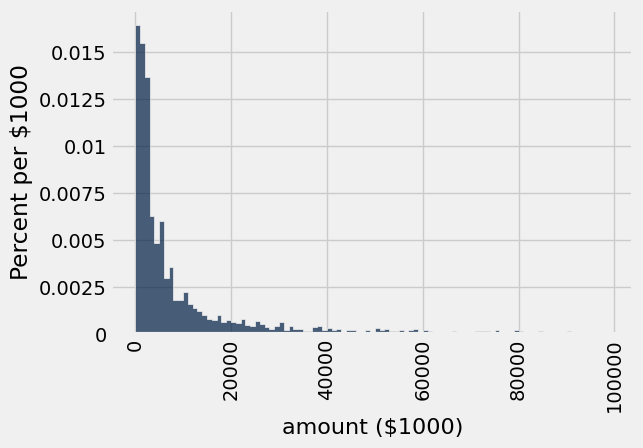

In [94]:
ceos.hist('amount', bins=np.arange(0, 1e5, 1e3), unit='$1000')

In [95]:
b_donations = billionaires.join('name', ceos, 'ceo')
b_donations.show()

name,citizenship,net worth,industry,Continent,company,party,amount
Barry Diller,United States,5479965153,Technology,North America,Coca-Cola Co,100,107500
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,100,3000
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,200,225900
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,100,39400
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,200,107000
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000
Charles Koch,United States,61046822719,Industrial,North America,Assurant,100,1500
Charles Koch,United States,61046822719,Industrial,North America,Assurant,200,25400
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,100,1800
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06


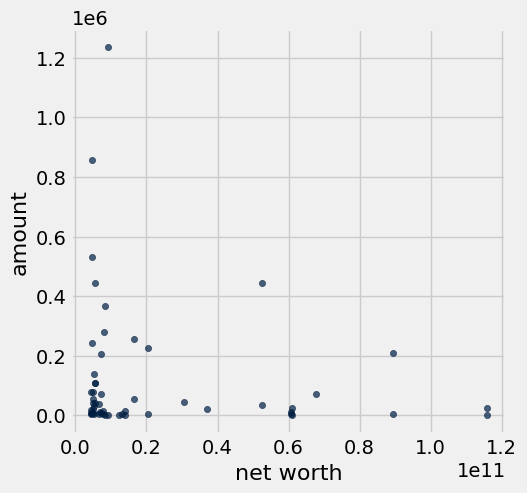

In [96]:
b_donations.where('amount', are.below(6e6)).scatter('net worth', 'amount')

In [97]:
donation_prop = b_donations.column('amount') / b_donations.column('net worth')
b_donations = b_donations.with_column('Contribution%', donation_prop)
b_donations = b_donations.sort('amount', descending=True)
b_donations.set_format('Contribution%', PercentFormatter)
b_donations.show(20)

name,citizenship,net worth,industry,Continent,company,party,amount,Contribution%
Sheldon Adelson,United States,38008857087,Entertainment,North America,Las Vegas Sands,200,6.20425e+06,0.02%
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06,0.01%
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000,0.02%
Kelcy Warren,United States,4595072119,Energy,North America,Energy Transfer,200,529886,0.01%
Jim Walton,United States,52493506006,Retail,North America,Wal-Mart Stores Inc,200,444700,0.00%
Ray Hunt,United States,5421192714,Energy,North America,PepsiCo Inc,200,442364,0.01%
Richard Kinder,United States,8398076785,Energy,North America,Kinder Morgan,200,368000,0.00%
John Malone,United States,8069296402,Media & Telecom,North America,Liberty Global,200,280050,0.00%
Eric Schmidt,United States,16579148665,Technology,North America,google,100,257300,0.00%
Reed Hastings,United States,4569628489,Technology,North America,Facebook,100,241700,0.01%


In [98]:
.02 / 100 * 20000

4.0

## Meteorites

In [99]:
meteorites = Table.read_table('meteorites_na.csv')
meteorites

name,class,mass,how,year,lat,lon
Abee,EH4,107000,Fell,1952,54.2167,-113
Acapulco,Acapulcoite,1914,Fell,1976,16.8833,-99.9
Allegan,H5,32000,Fell,1899,42.5333,-85.8833
Allende,CV3,2e+06,Fell,1969,26.9667,-105.317
Andover,L6,3200,Fell,1898,44.6167,-70.75
Archie,H6,5070,Fell,1932,38.5,-94.3
Ash Creek,L6,9500,Fell,2009,31.805,-97.01
Atemajac,L6,94.2,Fell,1896,20.0667,-103.667
Athens,LL6,265,Fell,1933,34.75,-87
Atoka,L6,1384.2,Fell,1945,34.3167,-96.15


In [100]:
meteorites.group('class').sort(1, descending=True)

class,count
H5,293
L6,278
H4,186
L5,136
H6,132
"Iron, IIIAB",124
L4,53
OC,43
"Iron, IIAB",42
"Iron, IAB-MG",37


In [101]:
meteorites.group('how')

how,count
Fell,181
Found,1626


In [102]:
meteorites.group('how', np.average)

how,name average,class average,mass average,year average,lat average,lon average
Fell,,,38316.9,1926.62,37.2264,-93.3681
Found,,,132638,1958.22,36.206,-103.928


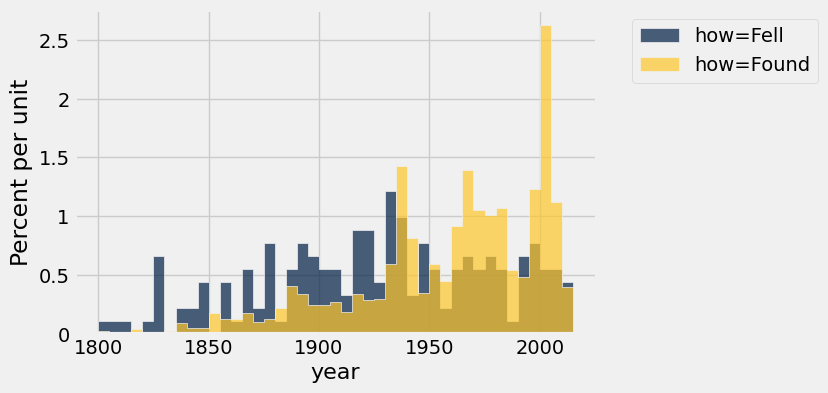

In [103]:
meteorites.hist('year', bins=np.arange(1800, 2020, 5), group='how')

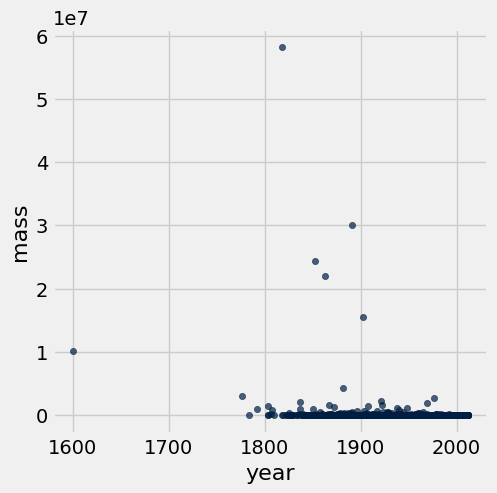

In [104]:
meteorites.scatter('year', 'mass')

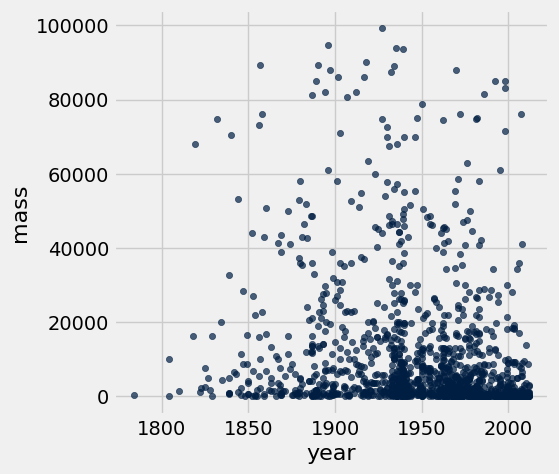

In [105]:
meteorites.where('mass', are.below(1e5)).scatter('year', 'mass')

In [106]:
new_fell = meteorites.where('how', 'Fell').where('year', are.above(1950))
new_found  = meteorites.where('how', 'Found').where('year', are.above(1950))
new_found

name,class,mass,how,year,lat,lon
Abajo,H5,331,Found,1982,26.8,-105.417
Abbott,H3-6,21100,Found,1951,36.3,-104.283
Ackerly,L5,3046,Found,1995,32.5903,-101.772
Acomita,"Pallasite, PMG",3956,Found,1962,35.05,-107.567
Acuña,"Iron, IIIAB",217700,Found,1981,29.3167,-100.967
Akron (1961),L6,4000,Found,1961,40.15,-103.167
Albion,"Iron, IVA",12280,Found,1966,46.8333,-117.25
Aldama (a),"Iron, IIIAB",11000,Found,1985,28.8333,-105.867
Aldama (b),H5,66.5,Found,1996,25.05,-106
Alkali,H6,30.47,Found,1998,37.8667,-117.4


In [108]:
new_fell

name,class,mass,how,year,lat,lon
Abee,EH4,107000,Fell,1952,54.2167,-113
Acapulco,Acapulcoite,1914,Fell,1976,16.8833,-99.9
Allende,CV3,2e+06,Fell,1969,26.9667,-105.317
Ash Creek,L6,9500,Fell,2009,31.805,-97.01
Battle Mountain,L6,2900,Fell,2012,40.6681,-117.189
Bells,C2-ung,375,Fell,1961,33.6,-96.4667
Berthoud,Eucrite-mmict,960,Fell,2004,40.3058,-105.023
Bruderheim,L6,303000,Fell,1960,53.9,-112.883
Burnwell,H4-an,1504,Fell,1990,37.6219,-82.2372
Buzzard Coulee,H4,41000,Fell,2008,52.996,-109.848


## Maps

In [125]:
Circle.map_table(new_fell.select('lat', 'lon', 'name'))

In [127]:
Circle.map_table(new_found.select('lat', 'lon', 'name'), radius=10,color='gold')

## Bikes

If you loaded the meteorites dataset above, now might be a good time to restart your kernel, run the cell at the top of the notebook, then come back here. 

The bike datasets in this section is big, and could lead to kernel crashes.

In [128]:
trip = Table.read_table('trip.csv')
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


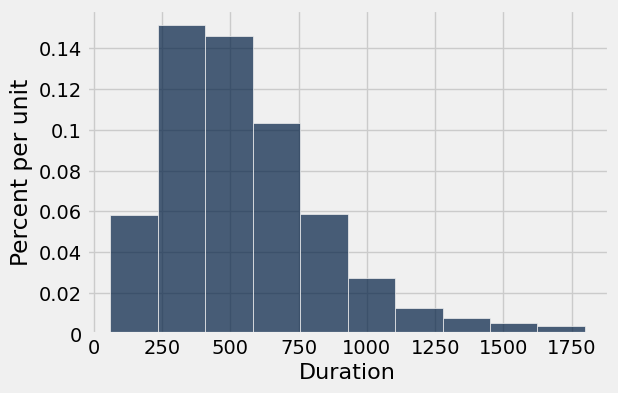

In [129]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

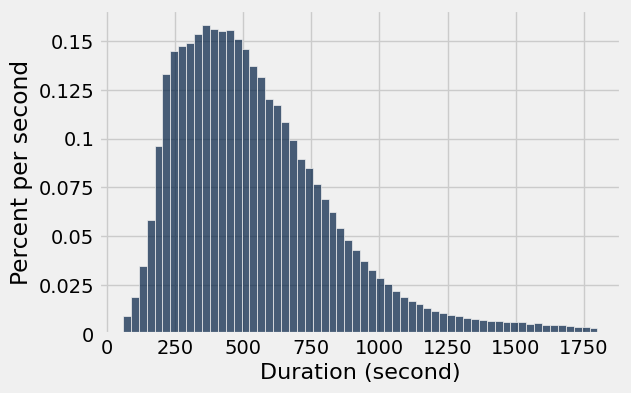

In [130]:
commute.hist('Duration', bins=60, unit='second')

In [131]:
# Percent of people who have a ride duration between 500 and 250 seconds
(500-250) * 0.15 

37.5

In [132]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [133]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [135]:
shortest = duration.group(['Start Station', 'End Station'], min).relabeled('Duration min', 'Minimum Duration')
shortest

Start Station,End Station,Minimum Duration
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


In [136]:
from_cc = shortest.where('Start Station', are.containing('Civic Center BART')).sort('Minimum Duration')
from_cc

Start Station,End Station,Minimum Duration
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


## Maps, again

In [137]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [139]:
Marker.map_table(stations.select('lat', 'long', 'name').relabeled('name','labels'))

In [140]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=15)

/home/shaolin/Documents/Teaching/2023/cs2065/venv/lib/python3.9/site-packages/datascience/maps.py:800: FutureWarning: The 'radius' argument is deprecated. Please use 'area' instead.
  warnings.warn("The 'radius' argument is deprecated. Please use 'area' instead.", FutureWarning)


## Extra practice

### Write a Python expression below each of the following descriptions that computes its value. You may use more than one line.

In [ ]:
# The name of the station where the most rentals ended (assume no ties).

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends

Below are solutions. Please look at them only after trying the above first

In [ ]:
# The name of the station where the most rentals ended (assume no ties).
# First, find end counts
# Then, find the station with the highest end count
trip.group('End').sort('count', descending=True).column(0).item(0)

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

# First, find the average end time for each station
# Then, keep the ones above 10 minutes
# Then, count them
trip.group('End', np.average).where(2, are.above(10*60)).num_rows

In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends.

# First, group the trip on starts and ends, separately
# Then, join the two grouped tables
# Then, count the number of rows where the stations' start and end counts are bove 500
start_counts, end_counts = trip.group('Start').relabeled('count', 'Start Count'), trip.group('End').relabeled('count', 'End Count')
start_counts.join('Start', end_counts, 'End').where(
    'Start Count', are.above(500)).where('End Count', are.above(500)).num_rows

In [148]:
drinks = Table(['Drink', 'Cafe', 'Price'])

drinks = drinks.with_rows([
    ['Milk Tea', 'One', 4],
    ['Espresso', 'Nef',  2],
    ['Cafe',    'Nef',  3],
    ['Espresso', "Abe",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,One,4
Espresso,Nef,2
Cafe,Nef,3
Espresso,Abe,2


In [149]:
discounts = Table(['Coupon', 'Location'])

discounts = discounts.with_rows([
    [5, 'One'],
    [50, 'Nef'],
    [25,  'One']
])
discounts

Coupon,Location
5,One
50,Nef
25,One


In [151]:
combined = drinks.join('Cafe',discounts,'Location')

In [156]:
combined2 = combined.with_column('Dis price', combined.column('Price') - combined.column('Price') * combined.column('Coupon')/100)
combined2

Cafe,Drink,Price,Coupon,Dis price
Nef,Espresso,2,50,1
Nef,Cafe,3,50,1.5
One,Milk Tea,4,5,3.8
One,Milk Tea,4,25,3


In [161]:
combined2.select('Cafe','Dis price').group('Cafe',np.min).join('Dis price amin', combined2, 'Dis price').select('Cafe','Drink','Dis price amin')

Cafe,Drink,Dis price amin
Nef,Espresso,1
One,Milk Tea,3


In [3]:
arr = make_array(1,2,3,4,5)
arr

array([1, 2, 3, 4, 5])

In [4]:
np.diff(arr)

array([1, 1, 1, 1])